In [ ]:
from tilepy.tools.VisualizationTools import Pretty_Plot
from tilepy.include.CampaignDefinition import ObservationParameters
import datetime

/opt/miniconda3/envs/tilepy3/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


Adjust the following as desired

In [2]:
# adjust the following as desired
configDir = "../config/"
datasetDir = "../../tilepy/dataset/"
outDir = "../paperplots/"
galcatName = "Gladeplus.h5"
pointingsFile = None
locCut = 500

Choose one of the follwing 4 examples

In [ ]:
skymap = "https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2023/bn231012231/quicklook/glg_healpix_all_bn231012231.fit"
# skymap = 'https://gracedb.ligo.org/api/superevents/S240624cd/files/cwb.multiorder.fits,1'
obsTime = datetime.datetime.fromisoformat("2023-10-12 20:42:18")

name = "GRB231012A_PWG"
PointingsFile1 = "../sciencecases/bn231012231/PGWinFoV_NObs/SuggestedPointings_GWOptimisation_LST1.txt"
PointingsFile2 = "../sciencecases/bn231012231/PGWinFoV_NObs/SuggestedPointings_GWOptimisation_LST2.txt"
dirName = "../paperplots"

Procceed with the cells one by one 

In [4]:
cfgFile = "../config/FollowupParameters_LST.ini"
obspar = ObservationParameters()
obspar.add_parsed_args(skymap, obsTime, datasetDir, galcatName, outDir, pointingsFile)
obspar.from_configfile(cfgFile)
print(obspar)

============== Observation Parameters ======================
Observatory Name: LST
Event Name: None
obsTime: 2025-07-02 20:42:18
---------------------- Strategy ----------------------
Algorithm = 3D, Strategy = integrated,  Mangrove = False
Do Plot = True, Do Rank = True, Count Previous= True, Second Round= False, Use Grey Time= True
--------------------- Observatory ---------------------
Observatory Location: 28.761944 deg, -17.89 deg, 2200.0 m
FOV: 1.0, Duration: 20.0, Min Duration: 10.0, Min Slewing: 0.0
Max Runs: 4, Max Nights: 1
Visibility: -18, -0.5, 65, 0
Min Moon Source Separation: 30
Max Moon Source Separation: 145
Max Zenith: 70, Zenith Weighting: 0.75
FoV number of sides: 0, --------------------- Skymap considerations ----------------
Skymap: https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2025/bn250702413/quicklook/glg_healpix_all_bn250702413.fit
Cuts: MinProbcut 0.002, Dist Cut: 500.0, Minimum Prob Cut for Catalogue: 0.01
Percentage MOC: 0.9
NSIDE: HR = 512, redu

Starting the pointing plotting from the following files

Loading map from  https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2025/bn250702413/quicklook/glg_healpix_all_bn250702413.fit
Filename 1:  ../../../../Desktop/MAGIC_GRB.txt
Filename 2:  ../../../../Desktop/LST_GRB.txt
Loading pointings
Loading pointings from ../../../../Desktop/MAGIC_GRB.txt
Loading pointings from ../../../../Desktop/LST_GRB.txt
Summary of 1st file: sum(PW)= 0.621 total pointings 6
Summary of 2st file: sum(PW)= 0.621 total pointings 6


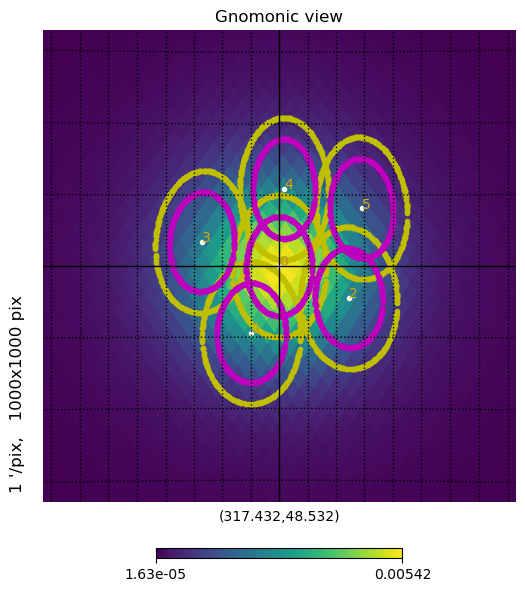

Starting the pointing plotting from the following files

Loading map from  https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2025/bn250702413/quicklook/glg_healpix_all_bn250702413.fit
Filename 1:  ../../../../Desktop/MAGIC_GRB.txt
Filename 2:  ../../../../Desktop/LST_GRB.txt
Loading pointings
Loading pointings from ../../../../Desktop/MAGIC_GRB.txt
Loading pointings from ../../../../Desktop/LST_GRB.txt
Summary of 1st file: sum(PW)= 0.621 total pointings 6
Summary of 2st file: sum(PW)= 0.621 total pointings 6


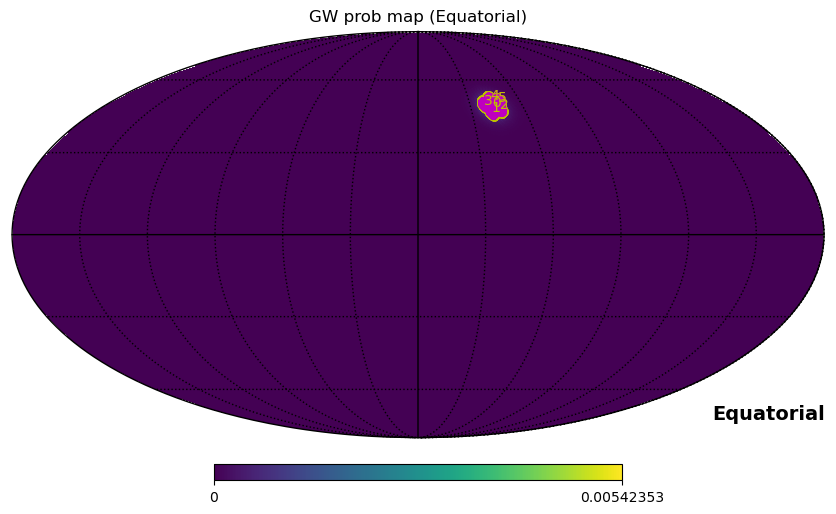

In [5]:
from tilepy.tools.VisualizationTools import CompareTwoTilings

plotType = "gnomonic"
CompareTwoTilings(skymap, PointingsFile1, PointingsFile2, plotType)
plotType = "mollweide"
CompareTwoTilings(skymap, PointingsFile1, PointingsFile2, plotType)

In [6]:
import pandas as pd

pd.read_csv(PointingsFile1, delimiter=" ", header=None, skiprows=1)

,0,1,2,3,4,5,6,7
0,2025-07-02T22:58:00,317.4324,48.5323,0.2099,1,LST,20.0,2.5
1,2025-07-02T23:18:00,318.8462,46.1782,0.0938,1,LST,20.0,2.5
2,2025-07-02T23:38:00,313.8158,47.3576,0.0894,1,LST,20.0,2.5
3,2025-07-02T23:58:00,321.6055,49.3128,0.0870,1,LST,20.0,2.5
4,2025-07-03T00:18:00,317.1635,51.2558,0.0842,1,LST,20.0,2.5
5,2025-07-03T00:38:00,312.8774,50.4800,0.0567,1,LST,20.0,2.5
